# Logistic regression

Adapted from [Pytorch tutorial for Deep Learning researchers](https://github.com/yunjey/pytorch-tutorial) (Yunvey Choi, 2018).

Used as part of Deep Learning, Gilles Louppe, 2018.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

# Hyper-parameters

In [2]:
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# Data

In [3]:
# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [4]:
data_iter = iter(train_loader)
X, y = data_iter.next()

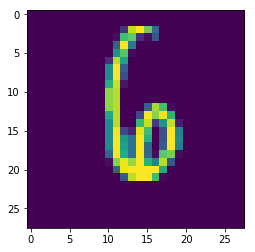

In [5]:
plt.imshow(X[2, 0])

# Model

In [6]:
# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LogisticRegression(input_size, num_classes)

In [7]:
model(Variable(X.view(-1, 28*28)))

tensor([[ 0.1325,  0.0991, -0.1516, -0.0527, -0.2537, -0.1245,  0.0726,
         -0.0568, -0.0388,  0.3154],
        [ 0.0260,  0.0012, -0.3698,  0.0418, -0.0589, -0.3042,  0.0863,
          0.0184,  0.1338,  0.0838],
        [ 0.0024, -0.3745,  0.2404, -0.0384, -0.0415,  0.0632,  0.3163,
         -0.0979,  0.1467, -0.3185],
        [ 0.0944, -0.1839,  0.2336, -0.1296, -0.2289, -0.0484,  0.3947,
         -0.1442,  0.0718, -0.2681],
        [ 0.1373, -0.0372, -0.0423, -0.0940,  0.1559, -0.2193,  0.2472,
          0.2086,  0.0982,  0.0668],
        [ 0.1252, -0.1126, -0.1416,  0.0267,  0.3008, -0.1437,  0.3418,
          0.2136,  0.0979, -0.0337],
        [ 0.1057, -0.1640, -0.0205, -0.1587, -0.0592,  0.0025,  0.1679,
          0.0129, -0.0079,  0.0962],
        [ 0.0773, -0.0738, -0.0123, -0.1396,  0.0871,  0.0904,  0.3767,
          0.0911, -0.2165,  0.0037],
        [ 0.1297, -0.2408, -0.1751, -0.0880,  0.3189, -0.0917,  0.4033,
          0.0853, -0.1524,  0.0994],
        [-0.0062,  

# Loss and optimizer

In [8]:
# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Training the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
                  % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss))

Epoch: [1/5], Step: [100/600], Loss: 2.2372
Epoch: [1/5], Step: [200/600], Loss: 2.1125
Epoch: [1/5], Step: [300/600], Loss: 2.0064
Epoch: [1/5], Step: [400/600], Loss: 1.9765
Epoch: [1/5], Step: [500/600], Loss: 1.9064
Epoch: [1/5], Step: [600/600], Loss: 1.7318
Epoch: [2/5], Step: [100/600], Loss: 1.7057
Epoch: [2/5], Step: [200/600], Loss: 1.7034
Epoch: [2/5], Step: [300/600], Loss: 1.6212
Epoch: [2/5], Step: [400/600], Loss: 1.5126
Epoch: [2/5], Step: [500/600], Loss: 1.5190
Epoch: [2/5], Step: [600/600], Loss: 1.5080
Epoch: [3/5], Step: [100/600], Loss: 1.3161
Epoch: [3/5], Step: [200/600], Loss: 1.4259
Epoch: [3/5], Step: [300/600], Loss: 1.2661
Epoch: [3/5], Step: [400/600], Loss: 1.3531
Epoch: [3/5], Step: [500/600], Loss: 1.3033
Epoch: [3/5], Step: [600/600], Loss: 1.2448
Epoch: [4/5], Step: [100/600], Loss: 1.1509
Epoch: [4/5], Step: [200/600], Loss: 1.1958
Epoch: [4/5], Step: [300/600], Loss: 1.2482
Epoch: [4/5], Step: [400/600], Loss: 1.1523
Epoch: [4/5], Step: [500/600], L

# Test the model

In [10]:
# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the model on the 10000 test images: 82 %
